# 数据分析步骤
1、导入必要的库

2、了解数据

3、数据可视化

4、使用k-means 进行聚类分析

## 1、导入库

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# plt.rcParams['font.sans-serif'] = ['SimHei']  # SimHei is another name for 黑体 in some systems
plt.rcParams['axes.unicode_minus'] = False


from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objects as go
import warnings
import os
warnings.filterwarnings('ignore')

## 2、了解数据

In [43]:
df=pd.read_csv('./data/original.csv')
df.head()

,id,性别,年龄,收入,消费得分,是否流失
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,1
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1


In [44]:
df.shape 

(2200, 6)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2200 non-null   int64 
 1   性别      2200 non-null   object
 2   年龄      2200 non-null   int64 
 3   收入      2200 non-null   int64 
 4   消费得分    2200 non-null   int64 
 5   是否流失    2200 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 103.3+ KB


In [46]:
df.dtypes

id       int64
性别      object
年龄       int64
收入       int64
消费得分     int64
是否流失     int64
dtype: object

In [47]:
df.isnull().sum()

id      0
性别      0
年龄      0
收入      0
消费得分    0
是否流失    0
dtype: int64

In [48]:
df.describe()

,id,年龄,收入,消费得分,是否流失
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,1100.500000,40.968182,72.370909,53.626364,0.763636
std,635.229617,13.877850,33.015336,20.739609,0.424945
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,550.750000,29.000000,44.000000,36.000000,1.000000
50%,1100.500000,41.000000,73.000000,54.000000,1.000000
75%,1650.250000,53.000000,100.000000,72.000000,1.000000
max,2200.000000,70.000000,137.000000,99.000000,1.000000


## 3、数据可视化

### 1）查看数据分布

In [44]:
# sns.pairplot(df)
# sns.pairplot(data, hue='churn', diag_kind='kde')

### 2）单独查看直方图分布

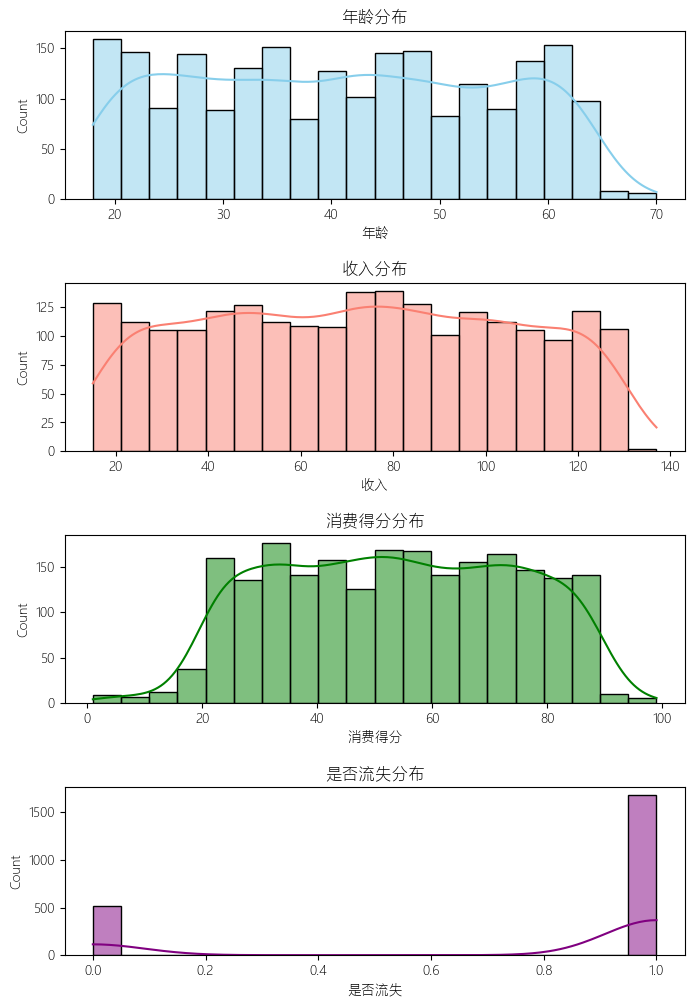

In [49]:
plt.figure(figsize=(8, 12))  # 调整整体图形大小

# 定义颜色列表
colors = ['skyblue', 'salmon', 'green', 'purple']

# 循环绘制直方图
for i, (column, color) in enumerate(zip(['年龄', '收入', '消费得分', '是否流失'], colors), 1):
    plt.subplot(4, 1, i)  # 将 1 改为 4
    sns.histplot(df[column], bins=20, kde=True, color=color)
    plt.title(f'{column}分布')

plt.subplots_adjust(hspace=0.5)  # 调整子图之间的垂直间距
plt.show()

## 完全流失客户分析

### 3）样本数据中的性别比

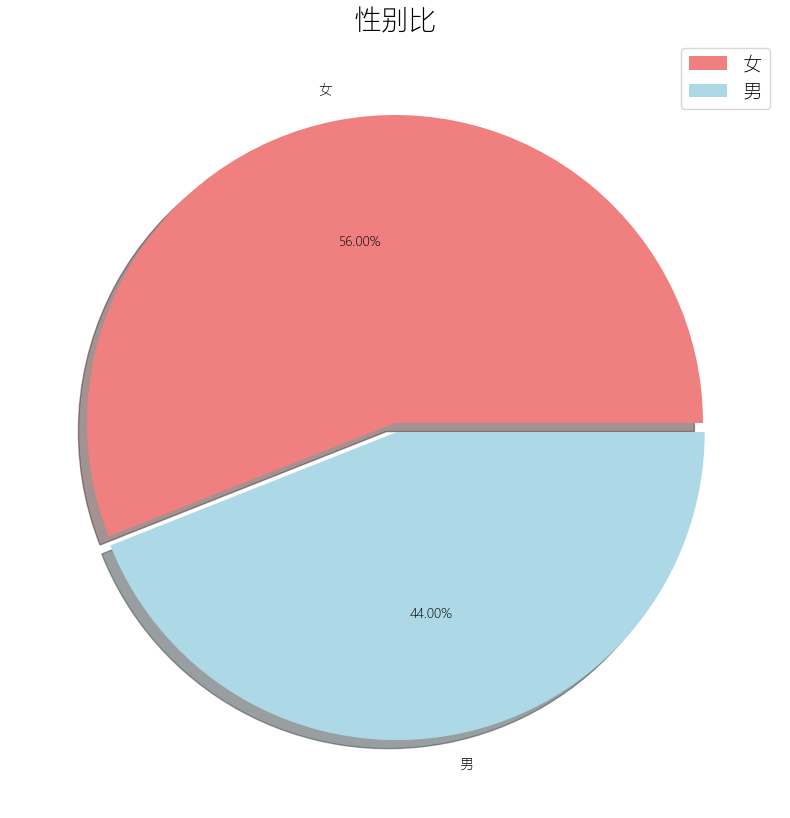

In [50]:
df = df.head(200)

labels=['女','男'] 
size=df['性别'].value_counts()
explode=[0,0.03]
colors = ['lightcoral', 'lightblue']

plt.figure(1,figsize=(10,10))
plt.pie(size,explode=explode,labels=labels,colors=colors,shadow=True,autopct='%.2f%%')
plt.title('性别比',fontsize=20)
plt.axis('off')
plt.legend(fontsize=14)
plt.show()

### 4）年龄与年收入之间的关系

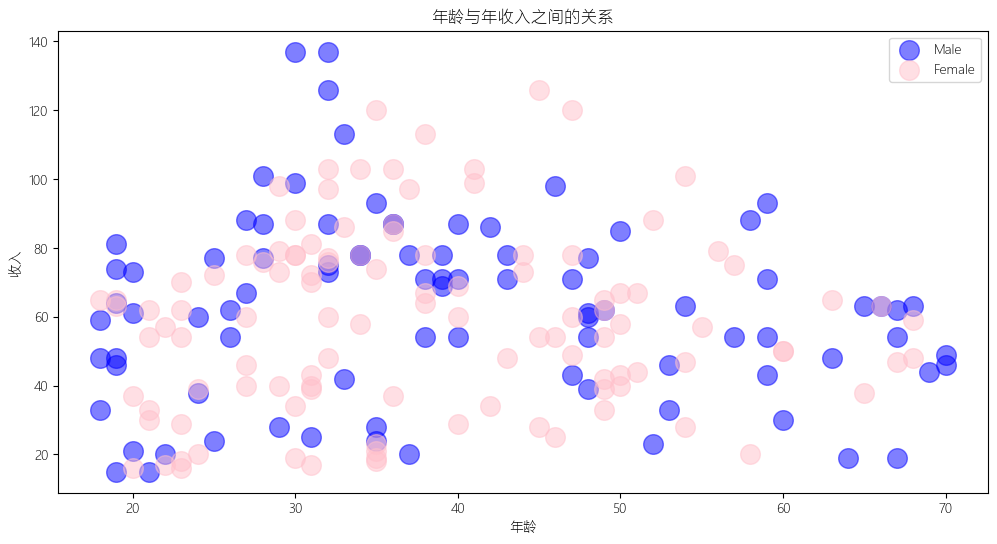

In [51]:
plt.figure(1,figsize=(12,6))
for gender, color in zip(['Male', 'Female'], ['blue', 'pink']):  
    plt.scatter(x='年龄', y='收入', data=df[df['性别'] == gender],
                s=200, alpha=0.5, label=gender, color=color)
plt.xlabel('年龄'),plt.ylabel('收入') 
plt.title('年龄与年收入之间的关系')
plt.legend() 
plt.show()

### 5）年龄与消费得分之间的关系

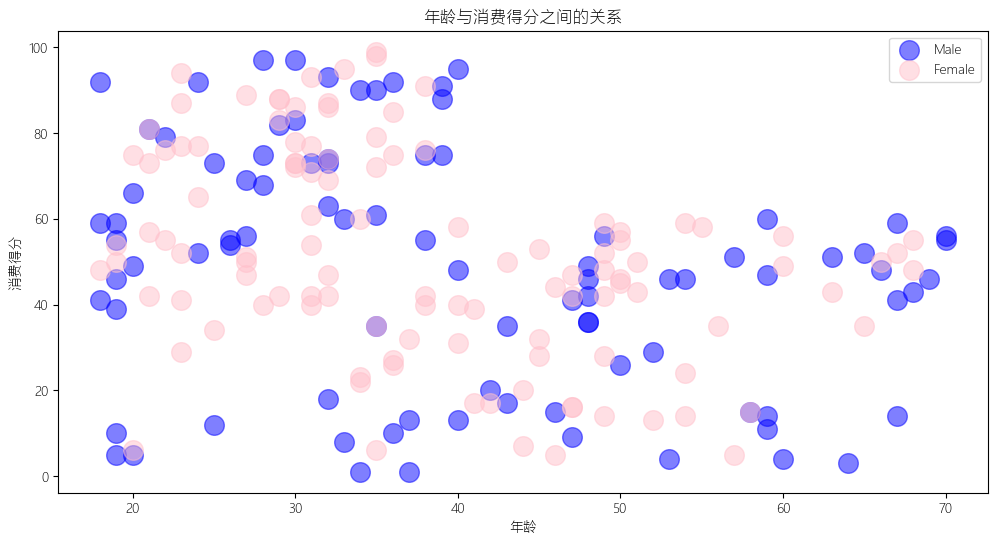

In [52]:
plt.figure(1,figsize=(12,6))
for gender, color in zip(['Male', 'Female'], ['blue', 'pink']):   
    plt.scatter(x='年龄',y='消费得分',data=df[df['性别']==gender],color=color,
               s=200,alpha=0.5,label=gender)
plt.xlabel('年龄'),plt.ylabel('消费得分') 
plt.title('年龄与消费得分之间的关系')
plt.legend() 
plt.show()

### 6）年收入与消费得分之间的关系

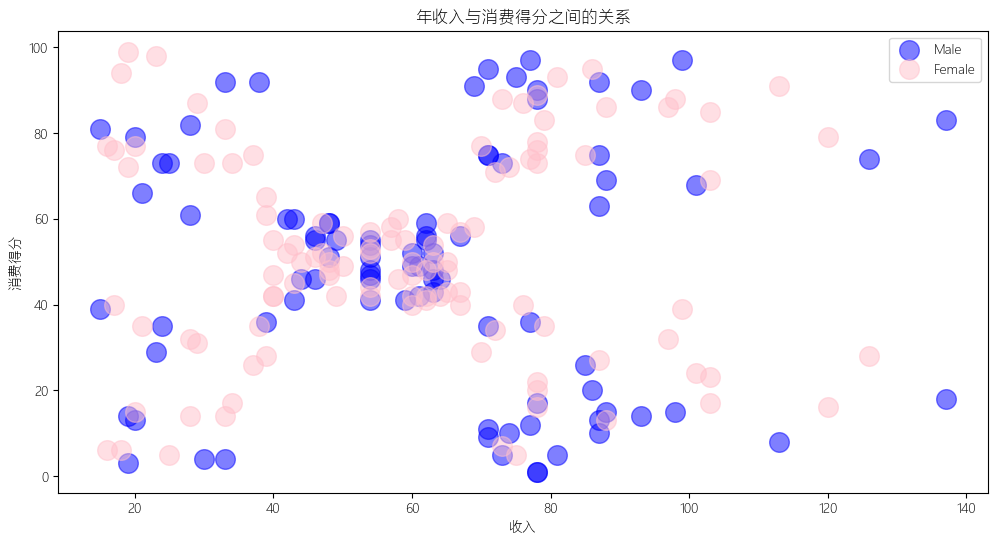

In [53]:
plt.figure(1,figsize=(12,6))
for gender, color in zip(['Male', 'Female'], ['blue', 'pink']):  
    plt.scatter(x='收入',y='消费得分',data=df[df['性别']==gender],color = color,
               s=200,alpha=0.5,label=gender)
plt.xlabel('收入'),plt.ylabel('消费得分') 
plt.title('年收入与消费得分之间的关系')
plt.legend() 
plt.show()

## 4、使用k - means聚类进行分析

### 1）根据年龄和消费得分进行细分

In [54]:
x1=df[['年龄','消费得分']].iloc[:,:].values
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,11):  
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=100)
    km.fit(x1)
    inertia.append(km.inertia_)

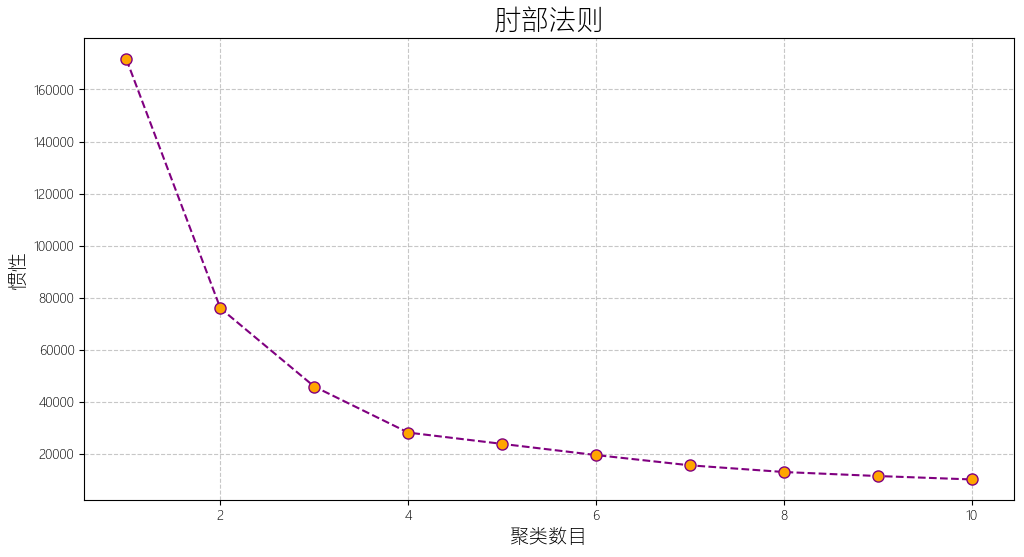

In [55]:
plt.figure(1, figsize=(12, 6))
plt.plot(range(1, 11), inertia, marker='o', color='purple', linestyle='dashed', markerfacecolor='orange', markersize=8)
plt.title('肘部法则', fontsize=20, fontweight='bold')  # Change the Chinese title as needed
plt.xlabel('聚类数目', fontsize=14)
plt.ylabel('惯性', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


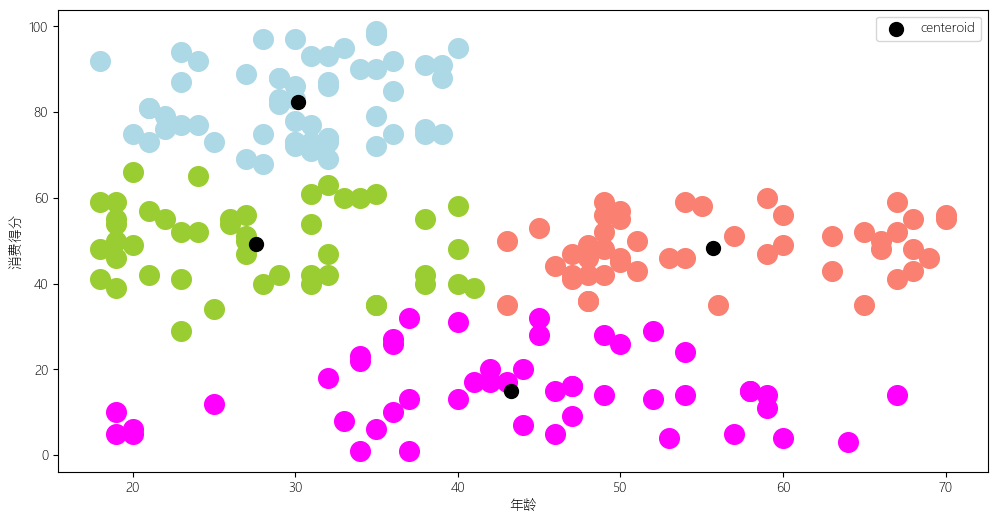

In [56]:
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 100)
y_means = km.fit_predict(x1)

plt.figure(1 , figsize = (12 , 6) )
plt.scatter(x1[y_means == 0, 0], x1[y_means == 0, 1], s = 200, c = 'salmon')
plt.scatter(x1[y_means == 1, 0], x1[y_means == 1, 1], s = 200, c = 'yellowgreen') 
plt.scatter(x1[y_means == 2, 0], x1[y_means == 2, 1], s = 200, c = 'lightblue')
plt.scatter(x1[y_means == 3, 0], x1[y_means == 3, 1], s = 200, c = 'magenta')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 100, c = 'black' , label = 'centeroid')

plt.ylabel('消费得分') , plt.xlabel('年龄')
plt.legend()
plt.show()

### 2）根据年收入和消费得分进行细分

In [57]:
x2=df[['收入','消费得分']].iloc[:,:].values
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,11):  
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=100)
    km.fit(x2)
    inertia.append(km.inertia_)

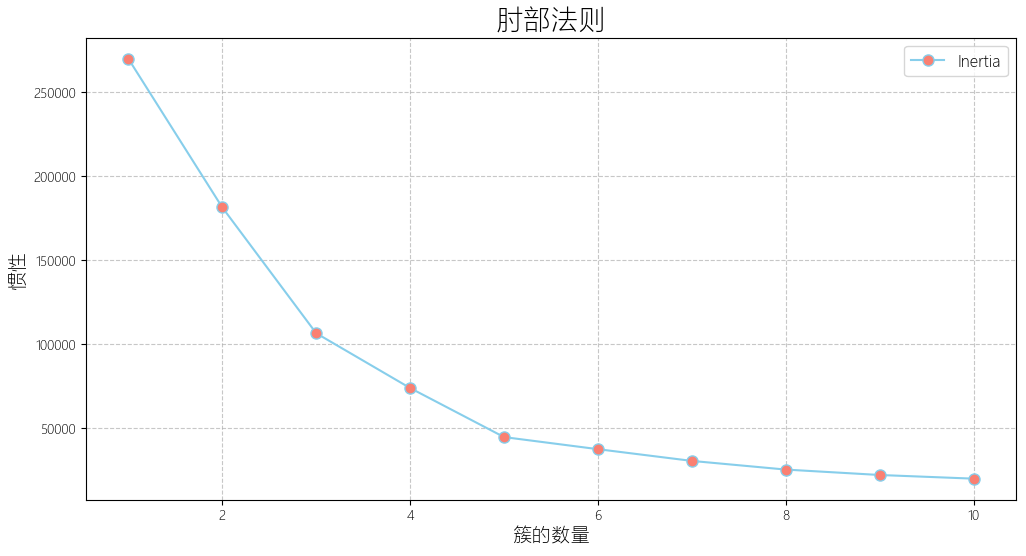

In [58]:
# plt.figure(1,figsize=(12,6))    
# plt.plot(range(1,11),inertia)
# plt.title('The Elbow Method',fontsize=20)
# plt.xlabel('Number of Clusters')
# plt.ylabel('inertia')
# plt.show()
plt.figure(1, figsize=(12, 6))    
plt.plot(range(1, 11), inertia, marker='o', color='skyblue', linestyle='-', markerfacecolor='salmon', markersize=8, label='Inertia')
plt.title('肘部法则', fontsize=20)  # Change the Chinese title as needed
plt.xlabel('簇的数量', fontsize=14)  # Change the x-axis label to Chinese
plt.ylabel('惯性', fontsize=14)  # Change the y-axis label to Chinese
plt.legend(fontsize=12)  # Add legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

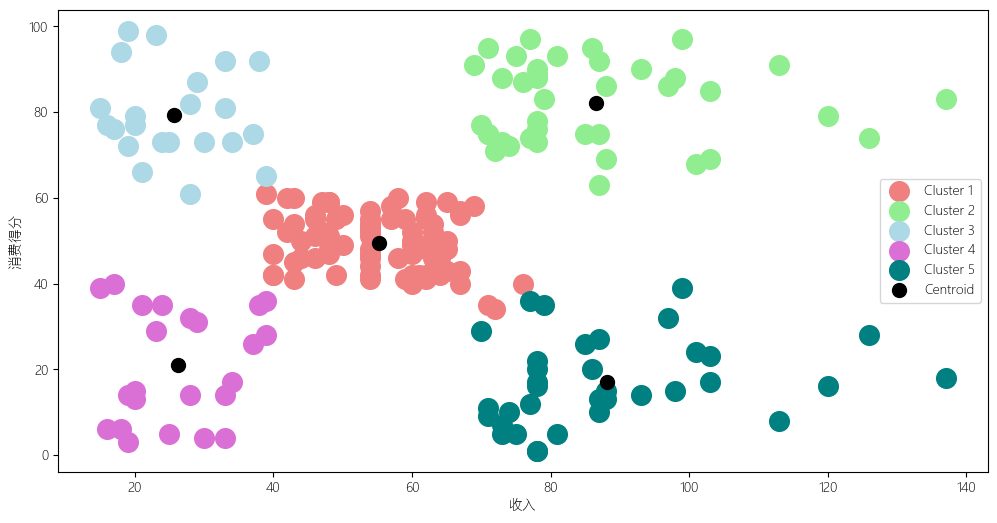

In [59]:
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=100)
y_means = km.fit_predict(x2)

plt.figure(1, figsize=(12, 6))
plt.scatter(x2[y_means == 0, 0], x2[y_means == 0, 1], s=200, c='lightcoral', label='Cluster 1')
plt.scatter(x2[y_means == 1, 0], x2[y_means == 1, 1], s=200, c='lightgreen', label='Cluster 2')
plt.scatter(x2[y_means == 2, 0], x2[y_means == 2, 1], s=200, c='lightblue', label='Cluster 3')
plt.scatter(x2[y_means == 3, 0], x2[y_means == 3, 1], s=200, c='orchid', label='Cluster 4')
plt.scatter(x2[y_means == 4, 0], x2[y_means == 4, 1], s=200, c='teal', label='Cluster 5')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=100, c='black', label='Centroid')

plt.ylabel('消费得分'), plt.xlabel('收入')
plt.legend()
plt.show()

### 3）根据年龄、年收入和消费得分进行细分

In [60]:
x3=df[['年龄' , '收入' ,'消费得分']].iloc[: , :].values
from sklearn.cluster import KMeans
inertia=[]
for i in range(1,11):  
    km=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    km.fit(x3)
    inertia.append(km.inertia_)

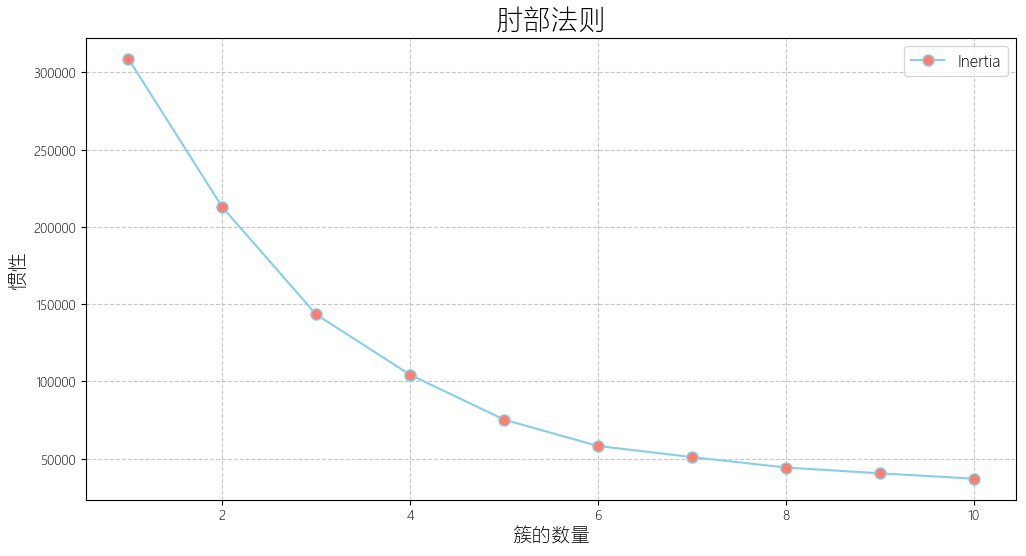

In [61]:
plt.figure(1, figsize=(12, 6))    
plt.plot(range(1, 11), inertia, marker='o', color='skyblue', linestyle='-', markerfacecolor='salmon', markersize=8, label='Inertia')
plt.title('肘部法则', fontsize=20)  # Change the Chinese title as needed
plt.xlabel('簇的数量', fontsize=14)  # Change the x-axis label to Chinese
plt.ylabel('惯性', fontsize=14)  # Change the y-axis label to Chinese
plt.legend(fontsize=12)  # Add legend
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [62]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 100  , algorithm='elkan') )
algorithm.fit(x3)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [63]:
import plotly.graph_objs as go
import plotly.offline as py
df['label'] = labels  # Assuming 'labels' is a list of color values

trace1 = go.Scatter3d(
    x=df['年龄'],
    y=df['消费得分'],
    z=df['收入'],
    mode='markers',
    marker=dict(
        color=df['label'],
        size=15,
        line=dict(
            color=df['label'],
            width=10
        ),
        opacity=0.8,
        colorscale='Viridis'  # You can change the colorscale as needed
    )
)

data = [trace1]
layout = go.Layout(
    height=800,
    width=800,
    title='Clusters',
    scene=dict(
        xaxis=dict(title='年龄'),
        yaxis=dict(title='消费得分'),
        zaxis=dict(title='收入')
    )
)

fig = go.Figure(data=data, layout=layout)
# py.iplot(fig)
py.plot(fig, filename='./data/3d_plot.html', auto_open=False)


'./data/3d_plot.html'

## 决策树

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


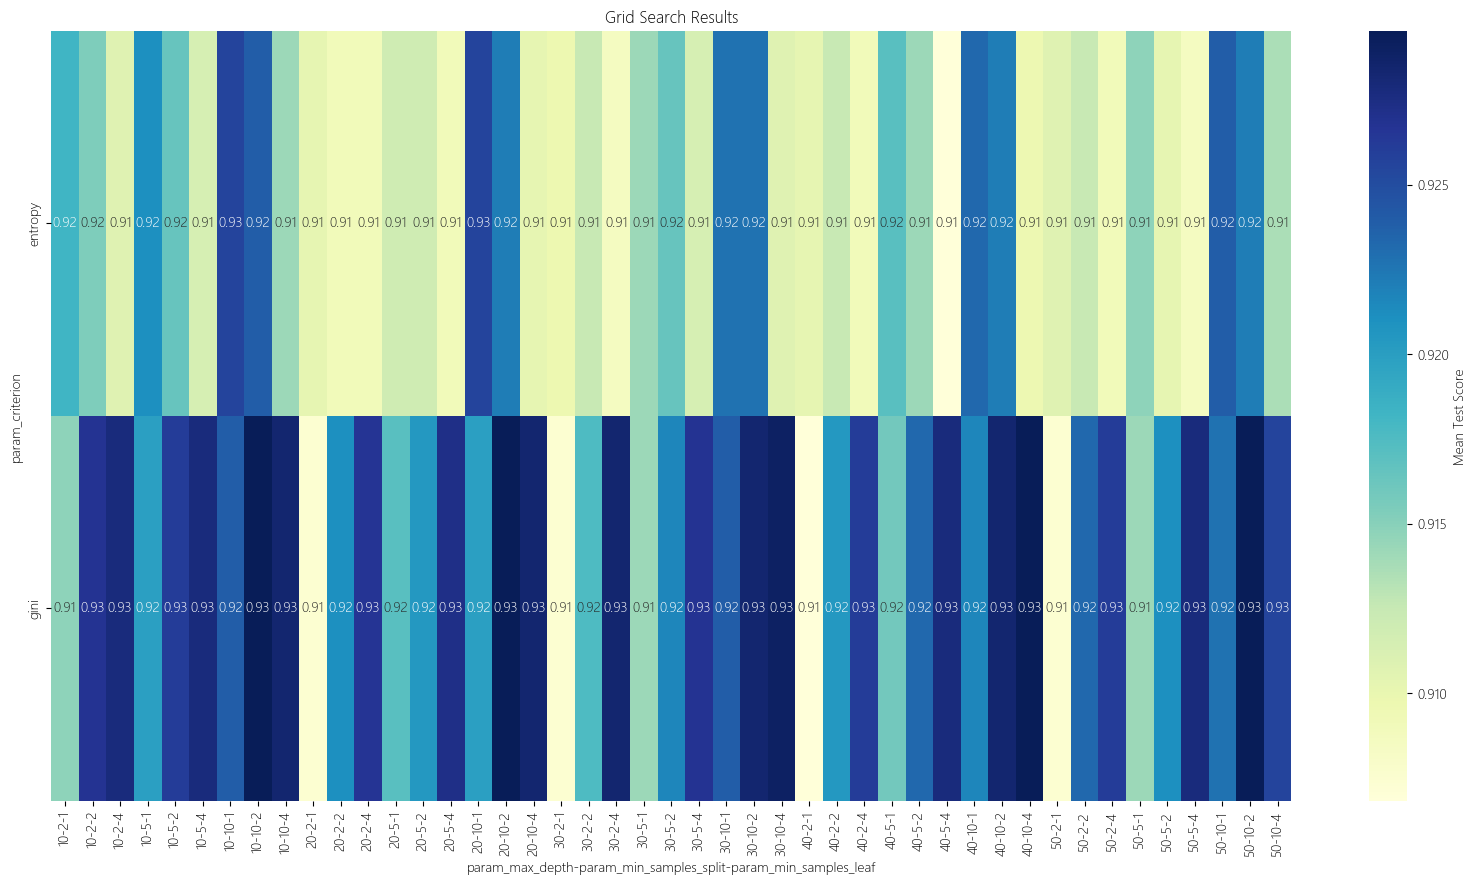

Accuracy: 0.9295454545454546
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.88      0.85        97
           1       0.96      0.94      0.95       343

    accuracy                           0.93       440
   macro avg       0.89      0.91      0.90       440
weighted avg       0.93      0.93      0.93       440



In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming df is your DataFrame, including columns 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)', and 'churn'
df = pd.read_csv('./data/original.csv')

df.head()
# Drop the 'id' column (make sure the column name matches the case)
df = df.drop('id', axis=1, errors='ignore')

# One-hot encoding
df = pd.get_dummies(df, drop_first=True)

# Split feature set and target variable
X = df.drop('是否流失', axis=1)
y = df['是否流失']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

# Define Decision Tree model
dt_model = DecisionTreeClassifier()  # Use DecisionTreeClassifier

# Define hyperparameter grid for Decision Tree
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': [None, 10, 20, 30, 40, 50],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Use grid search
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output the best parameters
print("Best Parameters:", grid_search.best_params_)

# Visualize grid search results
results = pd.DataFrame(grid_search.cv_results_)
scores = results.pivot_table(values='mean_test_score', index='param_criterion', columns=['param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf'])

# Plot heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(scores, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Mean Test Score'})
plt.title('Grid Search Results')
plt.show()

# Predict using the best model
best_dt_model = grid_search.best_estimator_
y_pred = best_dt_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


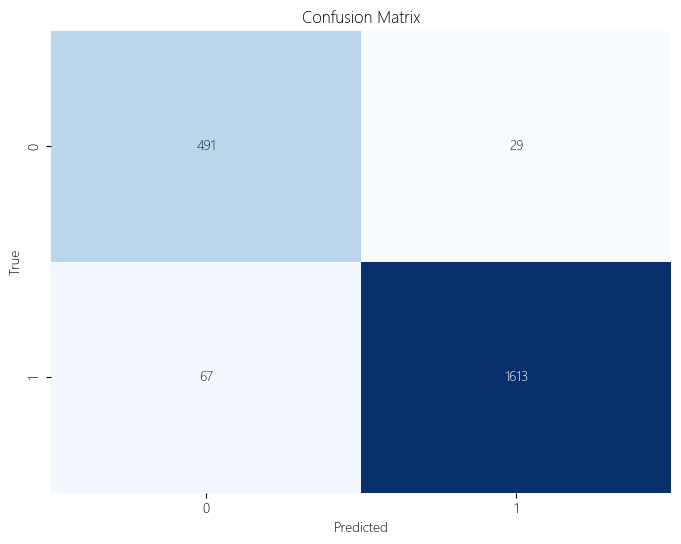

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       520
           1       0.98      0.96      0.97      1680

    accuracy                           0.96      2200
   macro avg       0.93      0.95      0.94      2200
weighted avg       0.96      0.96      0.96      2200



In [66]:
best_dt_model = DecisionTreeClassifier(criterion=grid_search.best_params_['criterion'],
                                       max_depth=grid_search.best_params_['max_depth'],
                                       min_samples_split=grid_search.best_params_['min_samples_split'],
                                       min_samples_leaf=grid_search.best_params_['min_samples_leaf'])

best_dt_model.fit(X_train, y_train)

# Predictions on all data
all_predictions_dt = best_dt_model.predict(X_scaled)

# Confusion matrix
conf_matrix_dt = confusion_matrix(y, all_predictions_dt)
plt.figure(figsize=(8, 6))  # Set the figure size as needed
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y, all_predictions_dt))

In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 加载新数据
newdata = pd.read_csv('./data/data1000.csv', encoding='utf-8')

# Drop the 'id' column
newdata = newdata.drop('id', axis=1, errors='ignore')

# One-hot encoding '性别' column
newdata = pd.get_dummies(newdata, drop_first=True)

# Standardize the data using the same scaler object
newdata_scaled = scaler.transform(newdata)

# Predict using the best model
newdata['预测是否流失'] = best_dt_model.predict(newdata_scaled)
# Save the predicted results to a CSV file
newdata[['预测是否流失']].to_csv('./data/predicted_results.csv', index=False)

# Display the predictions
print("Predicted churn for the new data:")
print(newdata[['预测是否流失']])

Predicted churn for the new data:
     预测是否流失
0         1
1         1
2         1
3         1
4         1
..      ...
995       1
996       1
997       1
998       0
999       0

[1000 rows x 1 columns]


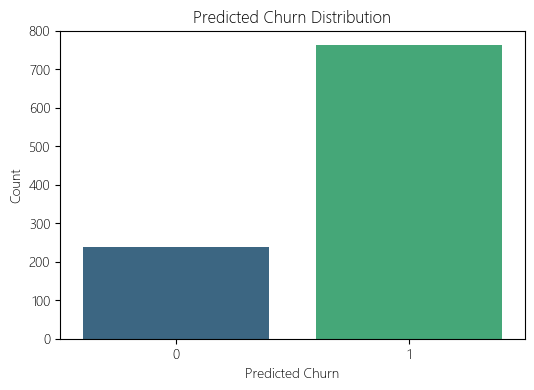

In [68]:
prediction_distribution = newdata['预测是否流失'].value_counts()

# 绘制柱状图
plt.figure(figsize=(6, 4))
sns.barplot(x=prediction_distribution.index, y=prediction_distribution.values, palette='viridis')
plt.title('Predicted Churn Distribution')
plt.xlabel('Predicted Churn')
plt.ylabel('Count')
plt.show()

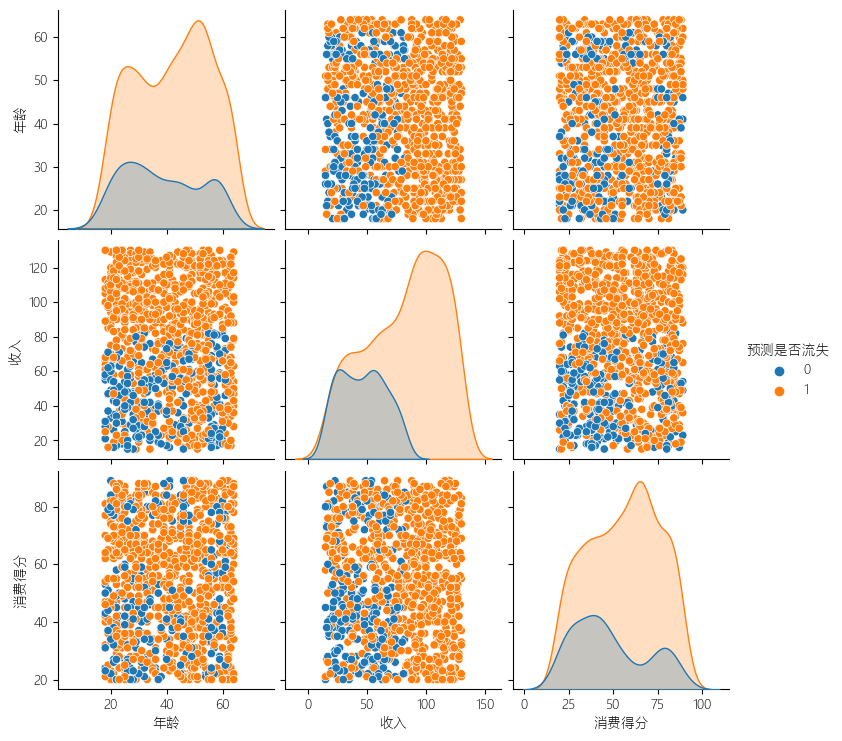

In [69]:
import seaborn as sns
sns.pairplot(newdata[['年龄', '收入', '消费得分', '预测是否流失']], hue='预测是否流失')
plt.show()
